<a href="https://colab.research.google.com/github/CristianMts/Escola-DNC/blob/main/RID146016_Desafio07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [60]:
!pip install yellowbrick

In [61]:
# Importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import pandas as pd
import plotly.express as px

## Etapa 01 - Análise exploratória dos dados


1. Carregue a base de dados;
2. Realize uma descrição estatística dos dados;
3. Visualize as distribuições e identifique a relevância das colunas para a análise;
4. Verifique a presença de dados nulos, duplicados, outliers e demais inconsistências nos dados.



In [62]:
# Lendo o dataset
df = pd.read_csv('/content/data.csv', encoding='ISO-8859-1')
df.head(10)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   
7    536366     22633               HAND WARMER UNION JACK         6   
8    536366     22632            HAND WARMER RED POLKA DOT         6   
9    536367     84879        ASSORTED COLOUR BIRD ORNAMENT        32   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  
5  12/1/2010 8:26       7.65     17850.0  United Kingdom  
6  12/1/2010 8:26       4.25     17850.0  United Kingdom  
7  12/1/2010 8:28       1.85     17850.0  United Kingdom  
8  12/1/2010 8:28       1.85     17850.0  United Kingdom  
9  12/1/2010 8:34       1.69     13047.0  United Kingdom

In [63]:
#Resumo estatístico para verificar dados numéricos
df.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

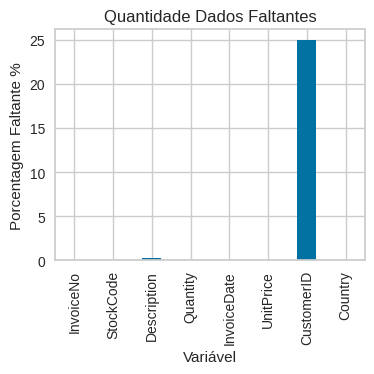

In [65]:
# Verificar valores nulos
(df.isnull().mean()*100).plot.bar(figsize=(4,3))
plt.ylabel('Porcentagem Faltante %')
plt.xlabel('Variável')
plt.title('Quantidade Dados Faltantes')
df.isnull().sum()

In [66]:
df[df.duplicated(keep=False)].sort_values('Description')

InvoiceNo StockCode                       Description  Quantity  \
483390    577503    72800B     4 PURPLE FLOCK DINNER CANDLES         1   
483414    577503    72800B     4 PURPLE FLOCK DINNER CANDLES         1   
160498    550459    72800B     4 PURPLE FLOCK DINNER CANDLES         1   
160509    550459    72800B     4 PURPLE FLOCK DINNER CANDLES         1   
460074    575895     23345                 DOLLY GIRL BEAKER         1   
...          ...       ...                               ...       ...   
113550    545980     84836       ZINC METAL HEART DECORATION         2   
468873    576559     23151         ZINC SWEETHEART SOAP DISH         1   
468850    576559     23151         ZINC SWEETHEART SOAP DISH         1   
104362    545166     84832  ZINC WILLIE WINKIE  CANDLE STICK         1   
104355    545166     84832  ZINC WILLIE WINKIE  CANDLE STICK         1   

             InvoiceDate  UnitPrice  CustomerID         Country  
483390  11/20/2011 12:34       2.55     18110.0  United Kingdom  
483414  11/20/2011 12:34       2.55     18110.0  United Kingdom  
160498   4/18/2011 13:17       2.55     18116.0  United Kingdom  
160509   4/18/2011 13:17       2.55     18116.0  United Kingdom  
460074  11/11/2011 14:50       1.25     17052.0  United Kingdom  
...                  ...        ...         ...             ...  
113550    3/8/2011 12:49       1.25     14730.0  United Kingdom  
468873  11/15/2011 13:19       2.49     14711.0  United Kingdom  
468850  11/15/2011 13:19       2.49     14711.0  United Kingdom  
104362   2/28/2011 14:03       0.85     17027.0  United Kingdom  
104355   2/28/2011 14:03       0.85     17027.0  United Kingdom  

[10147 rows x 8 columns]

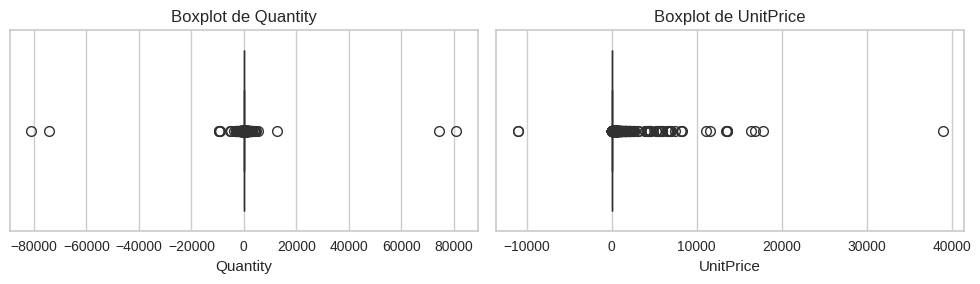

In [67]:
# Boxplot para detectar outliers
plt.figure(figsize=(10, 3))
plt.subplot(1, 2, 1)
sns.boxplot(x=df['Quantity'])
plt.title('Boxplot de Quantity')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['UnitPrice'])
plt.title('Boxplot de UnitPrice')

plt.tight_layout()
plt.show()

## Etapa 02 - Pré-processamento dos dados

1. Realize a normalização dos dados
2. Faça uma seleção das variáveis mais relevantes para o modelo;
3. Remova os dados nulos, duplicados, outliers e inconsistentes



In [68]:
#Drop linhas Nulas da Coluna 'CustomerID'
df.dropna(axis=0, subset='CustomerID', inplace=True)

In [69]:
df.drop(df.query('UnitPrice <= 0').index, axis=0, inplace=True)
df.drop(df.query('Quantity <= 0').index, axis=0, inplace=True)

In [70]:
# Removendo registros duplicados
df.drop_duplicates(inplace=True)
df.describe()

Quantity      UnitPrice     CustomerID
count  392692.000000  392692.000000  392692.000000
mean       13.119702       3.125914   15287.843865
std       180.492832      22.241836    1713.539549
min         1.000000       0.001000   12346.000000
25%         2.000000       1.250000   13955.000000
50%         6.000000       1.950000   15150.000000
75%        12.000000       3.750000   16791.000000
max     80995.000000    8142.750000   18287.000000

In [71]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)

In [72]:
# Alterando o tipo de dados
df = df.astype({'InvoiceDate': 'datetime64[ns]', 'CustomerID': 'int64'})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392692 entries, 0 to 392691
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    392692 non-null  object        
 1   StockCode    392692 non-null  object        
 2   Description  392692 non-null  object        
 3   Quantity     392692 non-null  int64         
 4   InvoiceDate  392692 non-null  datetime64[ns]
 5   UnitPrice    392692 non-null  float64       
 6   CustomerID   392692 non-null  int64         
 7   Country      392692 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 24.0+ MB


In [73]:
df

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
392687    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
392688    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
392689    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
392690    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
392691    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55       17850  United Kingdom  
1      2010-12-01 08:26:00       3.39       17850  United Kingdom  
2      2010-12-01 08:26:00       2.75       17850  United Kingdom  
3      2010-12-01 08:26:00       3.39       17850  United Kingdom  
4      2010-12-01 08:26:00       3.39       17850  United Kingdom  
...                    ...        ...         ...             ...  
392687 2011-12-09 12:50:00       0.85       12680          France  
392688 2011-12-09 12:50:00       2.10       12680          France  
392689 2011-12-09 12:50:00       4.15       12680          France  
392690 2011-12-09 12:50:00       4.15       12680          France  
392691 2011-12-09 12:50:00       4.95       12680          France  

[392692 rows x 8 columns]

In [74]:
# Eliminando outliers
df.drop(df.query('Quantity > 10000').index, axis=0, inplace=True)
df.drop(df.query('UnitPrice > 5000').index, axis=0, inplace=True)

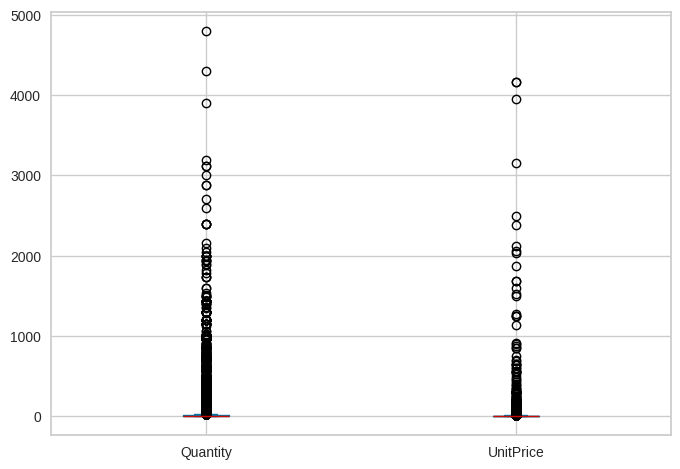

In [75]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df[['Quantity', 'UnitPrice']].plot.box();

In [76]:
# Criando Feature (Coluna Adicional)
df['Total'] = df['Quantity'] * df['UnitPrice']
df[['Quantity', 'UnitPrice', 'Total']].describe().style.format('{:.2f}')

In [77]:
#Recência, Frequência e Valor Monetário (RFM)
lastdate = df['InvoiceDate'].max()
lastdate
rfm = df.groupby('CustomerID').agg(
    recency=('InvoiceDate', lambda x: (lastdate - x.max()).days),  # Recência: dias desde a última compra
    frequency=('InvoiceDate', 'count'),  # Frequência: número de compras
    monetary_value=('Total', 'sum')  # Valor monetário: soma dos valores das compras
)
print(rfm.head())

            recency  frequency  monetary_value
CustomerID                                    
12347             1        182         4310.00
12348            74         31         1797.24
12349            18         73         1757.55
12350           309         17          334.40
12352            35         85         2506.04


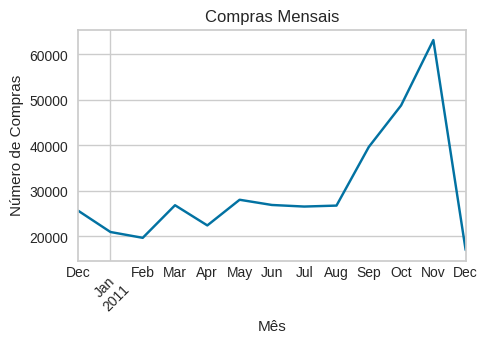

year_month
2010-12    25670
2011-01    20987
2011-02    19706
2011-03    26870
2011-04    22433
2011-05    28072
2011-06    26926
2011-07    26580
2011-08    26790
2011-09    39669
2011-10    48793
2011-11    63168
2011-12    17025
Freq: M, dtype: int64

In [78]:
# Análise Temporal: Comportamento de compras ao longo do tempo
df['year_month'] = df['InvoiceDate'].dt.to_period('M')
compras_por_mes = df.groupby('year_month').size()

plt.figure(figsize=(5, 3))
compras_por_mes.plot(kind='line')
plt.title('Compras Mensais')
plt.xlabel('Mês')
plt.ylabel('Número de Compras')
plt.xticks(rotation=45)
plt.show()
compras_por_mes

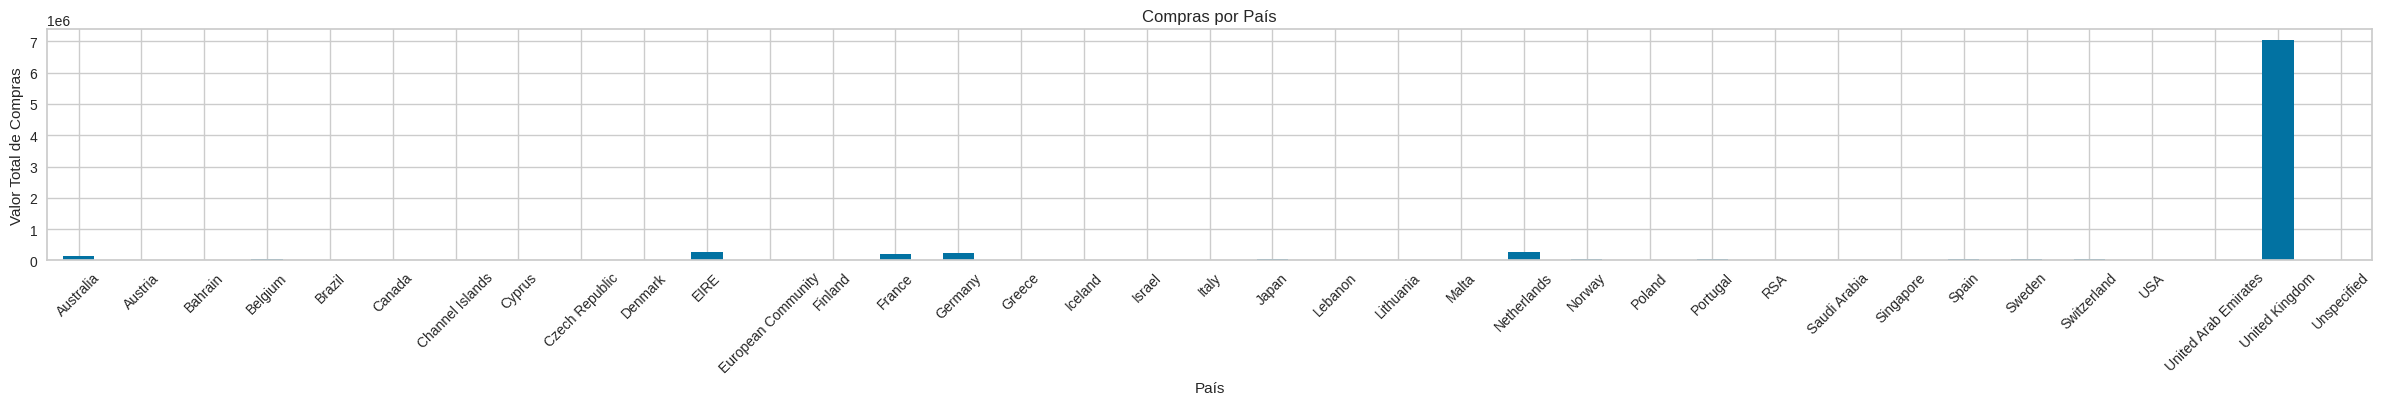

Country
Australia                138453.810
Austria                   10198.680
Bahrain                     548.400
Belgium                   41196.340
Brazil                     1143.600
Canada                     3666.380
Channel Islands           20440.540
Cyprus                    13502.850
Czech Republic              826.740
Denmark                   18955.340
EIRE                     265262.460
European Community         1300.250
Finland                   22546.080
France                   208934.310
Germany                  228678.400
Greece                     4760.520
Iceland                    4310.000
Israel                     7215.840
Italy                     17483.240
Japan                     37416.370
Lebanon                    1693.880
Lithuania                  1661.060
Malta                      2725.590
Netherlands              285446.340
Norway                    36165.440
Poland                     7334.650
Portugal                  33375.840
RSA                        1002.310
Saudi Arabia                145.920
Singapore                 21279.290
Spain                     61558.560
Sweden                    38367.830
Switzerland               56443.950
USA                        3580.390
United Arab Emirates       1902.280
United Kingdom          7031228.694
Unspecified                2660.770
Name: Total, dtype: float64

In [79]:
# Exemplo de dados de localização
compras_por_pais = df.groupby('Country')['Total'].sum()

compras_por_pais.plot(kind='bar', figsize=(30, 3))
plt.title('Compras por País')
plt.xlabel('País')
plt.ylabel('Valor Total de Compras')
plt.xticks(rotation=45)
plt.show()
compras_por_pais

In [80]:
# Seleção das variáveis mais relevantes para o modelo
df_cluster = df[['Quantity', 'UnitPrice', 'Total']]

In [81]:
scaler = PowerTransformer()
df_cluster_scaled = pd.DataFrame(scaler.fit_transform(df_cluster), index=df_cluster.index, columns=df_cluster.columns)
df_cluster_scaled

Quantity  UnitPrice     Total
0       0.175378   0.344659  0.373279
1       0.175378   0.681221  0.628012
2       0.430279   0.435051  0.697460
3       0.175378   0.681221  0.628012
4       0.175378   0.681221  0.628012
...          ...        ...       ...
392684  0.768511  -0.949555  0.005178
392685  0.175378   0.109898  0.197601
392686 -0.199281   0.911190  0.446629
392687 -0.199281   0.911190  0.446629
392688 -0.470713   1.103563  0.346357

[392689 rows x 3 columns]

<Axes: >

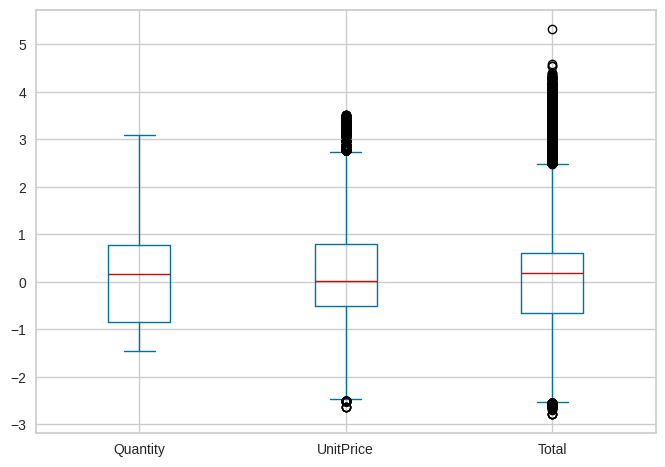

In [82]:
df_cluster_scaled.plot.box()

In [83]:
df_cluster.describe()

Quantity      UnitPrice          Total
count  392689.000000  392689.000000  392689.000000
mean       12.724550       3.105194      21.985370
std        43.083696      18.055047      95.899104
min         1.000000       0.001000       0.001000
25%         2.000000       1.250000       4.950000
50%         6.000000       1.950000      12.450000
75%        12.000000       3.750000      19.800000
max      4800.000000    4161.060000   38970.000000

In [84]:
df_cluster_clip = df_cluster.apply(lambda x: x.clip(upper=x.quantile(.90)))
df_cluster_clip.describe()

Quantity      UnitPrice          Total
count  392689.000000  392689.000000  392689.000000
mean        8.184204       2.494699      13.877651
std         7.654464       1.870354      10.600770
min         1.000000       0.001000       0.001000
25%         2.000000       1.250000       4.950000
50%         6.000000       1.950000      12.450000
75%        12.000000       3.750000      19.800000
max        24.000000       6.350000      35.400000

In [85]:
df_cluster_clip_scaled = df_cluster_clip.apply(scale)

##Etapa 03 - Selecione um algoritmo de clusterização

1. Escolha um algoritmo adequado para base de dados, como o K0Means, DBSCAN, Hierarquia ou Mean Shift
2. Encontre a quantidade ideal de clusters através dos métodos de Elbow ou Silhouette Score
3. Implemente o algoritmo escolhido



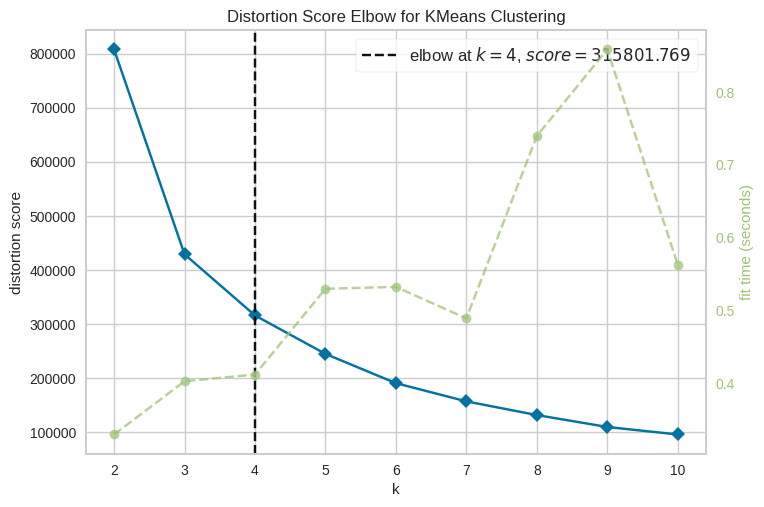

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [86]:
# KElbowVisualizer para encontrar o número ideal de clusters
visualizer = KElbowVisualizer(KMeans(), k=(2, 11), timing=False)
visualizer.fit(df_cluster_clip_scaled)
visualizer.show()

In [87]:
kmeans = KMeans(4)
kmeans_labels = kmeans.fit_predict(df_cluster_clip_scaled)

## Etapa 04 - Analise os clusters obtidos

1. Identifique os padrões e características em comum entre os clientes
2. Plote gráficos para auxiliar na análise



In [88]:
fig = px.scatter_3d(df_cluster_clip, x='Quantity', y='UnitPrice', z='Total', color=kmeans_labels, template='plotly_dark')

# Show the plot
fig.show()

In [89]:
centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_cluster_clip.columns)

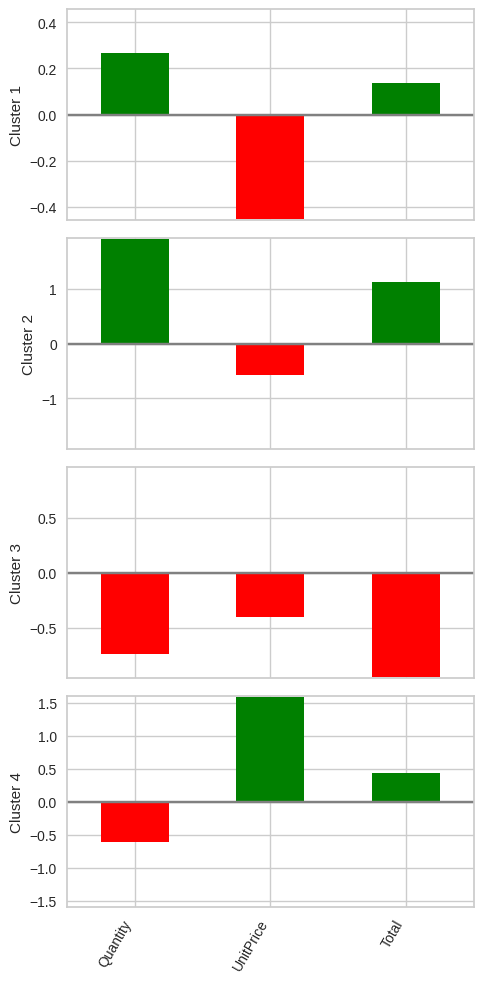

In [90]:
# Adaptando "Practical Statistics for Data Scientists"
fig, axes = plt.subplots(nrows=4, figsize=(5,10), sharex=True)

for i,ax in enumerate(axes):
  center = centers.loc[i,:]
  maxPC = 1.01 * center.abs().max()
  colors = ['green' if l > 0 else 'red' for l in center]
  center.plot.bar(ax=ax, color=colors)
  ax.set_ylabel(f'Cluster {i+1}')
  ax.set_ylim(-maxPC, maxPC)
  ax.axhline(color='gray')
  ax.xaxis.set_ticks_position('none')

plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

In [91]:
(
    df_cluster_clip.assign(cluster=kmeans_labels)
    .groupby('cluster')
    .mean()
    .transpose()
    .style.background_gradient(cmap='YlOrRd', axis=1)
)

## Etapa 05 - Interpretação dos resultados obtidos

#Perfis de compras dos clientes por cluster:
##Cluster 0:
Compram pouco e gastam pouco.
Fazem compras de vez em quando, sem muita regularidade.
Normalmente escolhem produtos baratos.

##Cluster 1:
São os que compram em maior quantidade.
Adoram promoções e produtos com preços acessíveis.
Fazem compras com frequência e gastam bastante.

##Cluster 2:
Compram uma quantidade moderada de produtos.
Preferem opções com bom custo-benefício.
Gastam um valor razoável, mas sem exageros.

##Cluster 3:
Compram poucos itens, mas escolhem produtos mais caros.
Gastam bem quando compram, mas não compram com frequência.
São clientes que valorizam qualidade e exclusividade.

___________________________________________________________
#Justifique como essa análise pode ser útil para empresa para segmentação de seus clientes e personalização das campanhas de marketing:
Essa análise é útil porque mostra como os clientes se comportam e ajuda a empresa a criar estratégias específicas para cada grupo.
##Segmentação:
 A empresa pode separar os clientes em grupos, como quem compra muito, quem gasta pouco ou quem prefere produtos caros. Assim, fica mais fácil planejar ações direcionadas.
##Personalização:
 Dá para criar ofertas que combinem com o que cada grupo gosta, como descontos para quem compra pouco ou produtos exclusivos para quem gasta mais.
##Eficiência:
 A empresa economiza dinheiro ao focar em campanhas que realmente funcionam para cada tipo de cliente.
##Sazonalidade:
 Ajuda a aproveitar períodos de alta demanda, como Natal, com promoções mais inteligentes.
No final, isso melhora a experiência dos clientes e aumenta as vendas.

_____________________________________________________
#Sugira ações possíveis com base nas ações realizadas:

##Para clientes que compram pouco:
1. Oferecer cupons de desconto para incentivar mais compras.
2. Enviar sugestões de produtos baratos e úteis.

##Para clientes que compram muito:
1. Criar promoções tipo "Compre mais e ganhe".
2. Oferecer vantagens como frete grátis para compras acima de um certo valor.

##Para clientes moderados:
1. Sugerir kits ou pacotes de produtos para aumentar o gasto médio.
2. Oferecer promoções com bom custo-benefício, como descontos progressivos.

##Para clientes premium:
1. Promover produtos exclusivos ou lançamentos especiais.
2. Oferecer atendimento personalizado ou programas de fidelidade VIP.

Essas ações ajudam a atrair mais compras, melhorar a experiência dos clientes e aumentar a receita da empresa.